# Import the libraries

In [51]:
#importing the libraries 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import warnings
warnings.filterwarnings("ignore")


In [52]:
x_train = np.loadtxt(r'C:\Users\Genius\Downloads\inputs.csv', delimiter=',')
y_train = np.loadtxt(r'C:\Users\Genius\Downloads\labels.csv', delimiter=',')

x_test = np.loadtxt(r'C:\Users\Genius\Downloads\input_test.csv', delimiter=',')
y_test = np.loadtxt(r'C:\Users\Genius\Downloads\labels_test.csv', delimiter=',')

In [53]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [54]:
print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)



Shape of x_train: (2000, 100, 100, 3)
Shape of y_train: (2000, 1)
Shape of x_test: (400, 100, 100, 3)
Shape of y_test: (400, 1)


In [55]:
x_train[:]


array([[[[ 37.,  39.,  25.],
         [ 26.,  24.,   9.],
         [ 34.,  25.,  10.],
         ...,
         [ 57.,  44.,  35.],
         [ 61.,  47.,  38.],
         [ 65.,  51.,  42.]],

        [[ 45.,  43.,  28.],
         [ 28.,  25.,   8.],
         [ 52.,  40.,  24.],
         ...,
         [ 54.,  41.,  32.],
         [ 57.,  43.,  34.],
         [ 61.,  47.,  38.]],

        [[ 52.,  45.,  26.],
         [ 32.,  24.,   5.],
         [ 69.,  54.,  35.],
         ...,
         [ 54.,  40.,  29.],
         [ 56.,  42.,  31.],
         [ 59.,  45.,  34.]],

        ...,

        [[ 20.,  39.,   0.],
         [101., 125.,  67.],
         [152., 182., 120.],
         ...,
         [ 46.,  41.,  19.],
         [ 60.,  55.,  33.],
         [ 60.,  55.,  33.]],

        [[ 46.,  65.,   9.],
         [116., 140.,  82.],
         [156., 186., 124.],
         ...,
         [ 64.,  60.,  35.],
         [ 75.,  71.,  46.],
         [ 72.,  68.,  43.]],

        [[ 81., 100.,  44.],
       

In [56]:
x_train=x_train/255.0
x_test=x_test/255.0

In [57]:
x_train[:]


array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

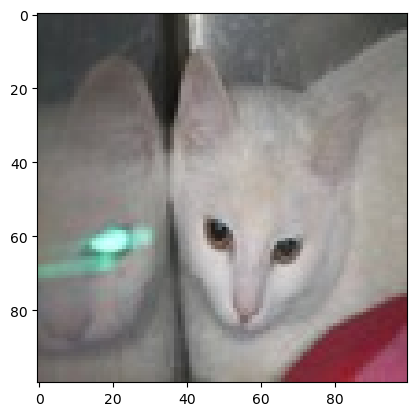

In [58]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()


In [59]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  
])

In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [61]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))



Epoch 1/5
63/63 [==============================] - 22s 275ms/step - loss: 0.7677 - accuracy: 0.5170 - val_loss: 0.6730 - val_accuracy: 0.6225
Epoch 2/5
63/63 [==============================] - 17s 263ms/step - loss: 0.6375 - accuracy: 0.6345 - val_loss: 0.6551 - val_accuracy: 0.6350
Epoch 3/5
63/63 [==============================] - 17s 263ms/step - loss: 0.5812 - accuracy: 0.6835 - val_loss: 0.6172 - val_accuracy: 0.6750
Epoch 4/5
63/63 [==============================] - 17s 263ms/step - loss: 0.5198 - accuracy: 0.7380 - val_loss: 0.5774 - val_accuracy: 0.7025
Epoch 5/5
63/63 [==============================] - 17s 265ms/step - loss: 0.4883 - accuracy: 0.7535 - val_loss: 0.5687 - val_accuracy: 0.7450


In [62]:
model.evaluate(x_test, y_test)


13/13 [==============================] - 1s 65ms/step - loss: 0.5687 - accuracy: 0.7450


[0.5687472820281982, 0.7450000047683716]

In [63]:
idx2 = random.randint(0, len(x_test) - 1)


plt.show()


In [64]:
# Make predictions for the single image
y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))

# Convert predictions to binary (True/False) based on the threshold of 0.5
binary_predictions = y_pred > 0.5

# Print the predictions
print("Predictions:", binary_predictions)


1/1 [==============================] - 0s 165ms/step
Predictions: [[False  True False False False False False False False False]]


In [65]:
# Find the index of the maximum value in y_pred
pred_class = np.argmax(y_pred)

# Check if the predicted class is 0 (assuming 0 represents "dog")
if pred_class == 0:
    pred = "DOG"
else:
    pred = "CAT"

print("Our model says it is:", pred)


Our model says it is: CAT
